# Final Project - Disaster Tweets Analysis
The task of this project is to classify Twitter tweets into two categories: talking or not talking about a disaster. This problem is solved through different deep learning techniques in the field of natural language processing (or NLP). Models cannot easily understand the complex patterns of language as easily as they can the correlations between numbers. How do you capture the meaning of "disaster"? How do know when a Twitter user is talking about "fire" in terms of a party or a burning house? These are just some examples that our model will have to solve to accurately classify whether a tweet is talking about a disaster or not.


## Installations

In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Collect data from public GH repo
!wget -O test.csv https://raw.githubusercontent.com/DavidUlloa6310/disaster_tweets/main/test.csv
!wget -O train.csv https://raw.githubusercontent.com/DavidUlloa6310/disaster_tweets/main/train.csv

--2024-04-20 02:08:08--  https://raw.githubusercontent.com/DavidUlloa6310/disaster_tweets/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 420783 (411K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 410.92K  --.-KB/s    in 0.03s   

2024-04-20 02:08:08 (15.4 MB/s) - ‘test.csv’ saved [420783/420783]

--2024-04-20 02:08:08--  https://raw.githubusercontent.com/DavidUlloa6310/disaster_tweets/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

## Data Exploration
Before we can begin building and basing solutions on the data, we must first understand it's features. From the most important features or interesting aspects of our data, we can start building.

In [35]:
# Load data with pandas
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

display("Training Data", train_data.head())
display("Test Data", test_data.head())

'Training Data'

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


'Test Data'

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [36]:
none_null = train_data['keyword'].dropna(inplace = False)
print(len(none_null), len(train_data))

7552 7613


In [37]:
none_null = train_data['keyword'].dropna(inplace = False)
print(len(none_null), len(train_data))

7552 7613


Despite `keyword` and `location` seemingly beign NaN for the head - it's actually not NaN for most rows. For our project, we're only going to use the text of the tweet and the label of whether or not the tweet describes a disaster. Let's perform that data, label split.

In [38]:
complete_x = np.array(train_data[["text"]])
complete_y = np.array(train_data[["target"]])

# Create a vector of indices and shuffle them
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)

cutoff_index = int(train_data.shape[0] * 0.80)

train_indices = indices[:cutoff_index]
val_indices = indices[cutoff_index:]

# Get training and validation data from the shuffled indices
train_X = complete_x[train_indices]
train_Y = complete_y[train_indices]
val_X = complete_x[val_indices]
val_Y = complete_y[val_indices]

An important question from the text data specifically is what are the words in the data. For example, if we assign each word a unique token, how many times does this word show up in the data? Luckily, TensorFlow has a `TextVectorization` function that help us find this.

In [39]:
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int",
    max_tokens=200
)

vectorize_layer.adapt(complete_x)

display("--Vocabulary--")
for i, token in enumerate(vectorize_layer.get_vocabulary()):
  endline = '\n' if i % 10 == 0 else ''
  display(f"{i}: {token}  ")


'--Vocabulary--'

'0:   '

'1: [UNK]  '

'2: the  '

'3: a  '

'4: in  '

'5: to  '

'6: of  '

'7: and  '

'8: i  '

'9: is  '

'10: for  '

'11: on  '

'12: you  '

'13: my  '

'14: with  '

'15: it  '

'16: that  '

'17: at  '

'18: by  '

'19: this  '

'20: from  '

'21: be  '

'22: are  '

'23: was  '

'24: have  '

'25: like  '

'26: as  '

'27: me  '

'28: up  '

'29: just  '

'30: but  '

'31: so  '

'32: im  '

'33: amp  '

'34: not  '

'35: your  '

'36: out  '

'37: its  '

'38: after  '

'39: will  '

'40: all  '

'41: no  '

'42: fire  '

'43: an  '

'44: has  '

'45: when  '

'46: if  '

'47: we  '

'48: get  '

'49: new  '

'50: now  '

'51: via  '

'52: more  '

'53: about  '

'54: or  '

'55: what  '

'56: people  '

'57: one  '

'58: news  '

'59: he  '

'60: they  '

'61: how  '

'62: dont  '

'63: been  '

'64: over  '

'65: who  '

'66: into  '

'67: do  '

'68: were  '

'69: video  '

'70: us  '

'71: can  '

'72: 2  '

'73: emergency  '

'74: disaster  '

'75: there  '

'76: police  '

'77: than  '

'78: her  '

'79: would  '

'80: still  '

'81: some  '

'82: his  '

'83: body  '

'84: burning  '

'85: crash  '

'86: back  '

'87: storm  '

'88: california  '

'89: suicide  '

'90: why  '

'91: them  '

'92: off  '

'93: time  '

'94: know  '

'95: got  '

'96: had  '

'97: man  '

'98: buildings  '

'99: day  '

'100: rt  '

'101: first  '

'102: see  '

'103: world  '

'104: going  '

'105: bomb  '

'106: cant  '

'107: nuclear  '

'108: love  '

'109: fires  '

'110: our  '

'111: attack  '

'112: youtube  '

'113: two  '

'114: 3  '

'115: killed  '

'116: dead  '

'117: go  '

'118: their  '

'119: train  '

'120: full  '

'121: war  '

'122: car  '

'123: being  '

'124: only  '

'125: may  '

'126: families  '

'127: today  '

'128: life  '

'129: hiroshima  '

'130: good  '

'131: accident  '

'132: think  '

'133: down  '

'134: watch  '

'135: say  '

'136: many  '

'137: last  '

'138: here  '

'139: u  '

'140: could  '

'141: want  '

'142: years  '

'143: too  '

'144: did  '

'145: way  '

'146: then  '

'147: make  '

'148: home  '

'149: collapse  '

'150: work  '

'151: because  '

'152: look  '

'153: best  '

'154: wildfire  '

'155: need  '

'156: even  '

'157: really  '

'158: mh370  '

'159: mass  '

'160: help  '

'161: death  '

'162: army  '

'163: am  '

'164: please  '

'165: lol  '

'166: year  '

'167: take  '

'168: him  '

'169: another  '

'170: those  '

'171: should  '

'172: right  '

'173: pm  '

'174: bombing  '

'175: youre  '

'176: school  '

'177: hot  '

'178: black  '

'179: 4  '

'180: forest  '

'181: fatal  '

'182: northern  '

'183: much  '

'184: 5  '

'185: 1  '

'186: water  '

'187: she  '

'188: obama  '

'189: let  '

'190: legionnaires  '

'191: great  '

'192: wreck  '

'193: never  '

'194: homes  '

'195: bomber  '

'196: 2015  '

'197: \x89Û  '

'198: live  '

'199: latest  '

Now that we've assigned each word in our dataset to unique number, let's count how many times each of the words show up. If we compare this distribution in our disaster tweets versus our non-disaster tweets, we should see the most relevant words in a disaster tweet vs a non-disaster tweet.

In [40]:
disaster_data = train_X[train_Y == 1]
non_disaster_data = train_X[train_Y == 0]

print(f"The amount of training data that is not relating to disasters is {len(disaster_data)}")
print(f"The amount of training data that is not relating to disasters is {len(non_disaster_data)}")

total = len(disaster_data) + len(non_disaster_data)
print(f"% of training data that is disaster: {len(disaster_data) / total:2f}")
print(f"% of training data that is not disaster: {len(non_disaster_data) / total:2f}")

The amount of training data that is not relating to disasters is 2617
The amount of training data that is not relating to disasters is 3473
% of training data that is disaster: 0.429721
% of training data that is not disaster: 0.570279


In [41]:
from collections import Counter

disaster_counter = Counter()
for example in disaster_data:
    disaster_counter.update(example.split(' '))

non_disaster_counter = Counter()
for example in non_disaster_data:
    non_disaster_counter.update(example.split(' '))

In [42]:
def plot_relevant_words(plot_title: str, counter_1: Counter, counter_2: Counter, color: str = "skyblue"):
    common = counter_1 - counter_2
    most_common = common.most_common(10)
    common_words = np.array(most_common)[:,0]
    count = np.array(most_common)[:,1].astype(int)
    plt.bar(common_words, count, color=color)
    plt.ylabel("frequency")
    plt.xlabel("word")
    plt.title(plot_title)
    plt.show()

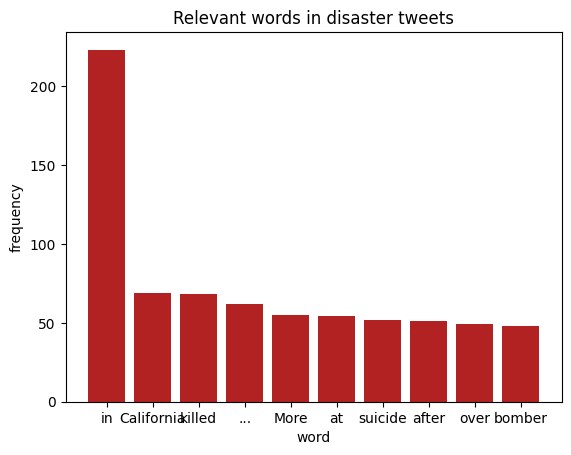

In [43]:
plot_relevant_words("Relevant words in disaster tweets", disaster_counter, non_disaster_counter, color="firebrick")

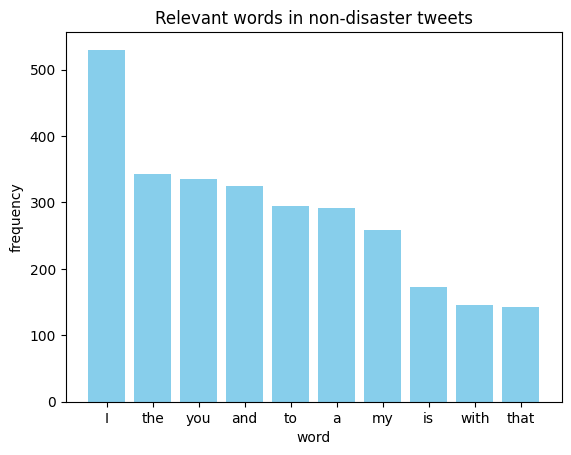

In [44]:
plot_relevant_words("Relevant words in non-disaster tweets", non_disaster_counter, disaster_counter)

The most relevant words for the disaster tweets make a lot of sense in relation to their classification, but non-disaster tweets are non-specific. This is possibly because non-disaster tweets can encompass any topic, which means they don't have certain words which are especially relevant to being "non-disaster tweets".

Let's look into the length of non-disaster tweets vs disaster tweets.

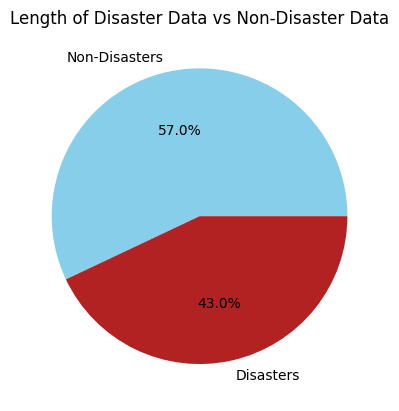

In [45]:
plt.pie([len(non_disaster_data), len(disaster_data)], labels = ['Non-Disasters', 'Disasters'], autopct='%1.1f%%', colors=["skyblue", "firebrick"])
plt.title('Length of Disaster Data vs Non-Disaster Data')
plt.show()

It looks like we have slightly more non-disaster tweets compared to disaster tweets, which could skew our model somehow if we're not careful.

Let's also look into the keywords of our disaster and non-disaster tweets on a list form instead of a bar graph - which should be easier to read.

In [46]:
Counter(train_data['keyword'].dropna())

Counter({'fatalities': 45,
         'armageddon': 42,
         'deluge': 42,
         'body%20bags': 41,
         'damage': 41,
         'harm': 41,
         'sinking': 41,
         'collided': 40,
         'evacuate': 40,
         'fear': 40,
         'outbreak': 40,
         'siren': 40,
         'twister': 40,
         'windstorm': 40,
         'collision': 39,
         'derailment': 39,
         'earthquake': 39,
         'explosion': 39,
         'famine': 39,
         'flames': 39,
         'hellfire': 39,
         'sinkhole': 39,
         'sunk': 39,
         'weapon': 39,
         'weapons': 39,
         'whirlwind': 39,
         'wreckage': 39,
         'wrecked': 39,
         'ambulance': 38,
         'blaze': 38,
         'bombed': 38,
         'deaths': 38,
         'derailed': 38,
         'drowned': 38,
         'explode': 38,
         'fatal': 38,
         'fire': 38,
         'flooding': 38,
         'hurricane': 38,
         'injury': 38,
         'oil%20spill': 38,
  

In [47]:
Counter(train_data[train_data['target'] == 1]['keyword'].dropna())

Counter({'derailment': 39,
         'outbreak': 39,
         'wreckage': 39,
         'debris': 37,
         'oil%20spill': 37,
         'typhoon': 37,
         'evacuated': 32,
         'rescuers': 32,
         'suicide%20bomb': 32,
         'suicide%20bombing': 32,
         'nuclear%20disaster': 31,
         'razed': 31,
         'airplane%20accident': 30,
         'earthquake': 30,
         'suicide%20bomber': 30,
         'bridge%20collapse': 29,
         'collision': 29,
         'wildfire': 29,
         'buildings%20on%20fire': 28,
         'casualties': 28,
         'drought': 28,
         'evacuation': 28,
         'mass%20murder': 28,
         'sandstorm': 28,
         'bombing': 27,
         'devastation': 27,
         'forest%20fires': 27,
         'hostages': 27,
         'sinkhole': 27,
         'wild%20fires': 27,
         'deaths': 26,
         'derailed': 26,
         'displaced': 26,
         'famine': 26,
         'fatal': 26,
         'fatalities': 26,
         'floo

In [48]:
Counter(train_data[train_data['target'] == 0]['keyword'].dropna())

Counter({'body%20bags': 40,
         'armageddon': 37,
         'harm': 37,
         'deluge': 36,
         'ruin': 36,
         'wrecked': 36,
         'explode': 35,
         'fear': 35,
         'siren': 35,
         'twister': 35,
         'aftershock': 34,
         'panic': 34,
         'screaming': 34,
         'blaze': 33,
         'blazing': 33,
         'blizzard': 33,
         'crush': 33,
         'sinking': 33,
         'traumatised': 33,
         'bloody': 32,
         'body%20bag': 32,
         'curfew': 32,
         'hellfire': 32,
         'upheaval': 32,
         'blew%20up': 31,
         'collide': 31,
         'electrocute': 31,
         'panicking': 31,
         'smoke': 31,
         'bleeding': 30,
         'blight': 30,
         'blood': 30,
         'screamed': 30,
         'screams': 30,
         'stretcher': 30,
         'sunk': 30,
         'wreck': 30,
         'army': 29,
         'catastrophe': 29,
         'demolish': 29,
         'desolation': 29,
       

Oddly enough - the key words in disaster and non-disaster tweets are similar. It's possible the keywords of this dataset are considered "sensitive" words, in which case they are relevant in both non-disaster and disaster tweets, but depending on the context can determine the classification of the example. In one instance 'lava' can be considered a keyword, but in the context of non-disaster tweets, 'lava lamp' could be a phrase and this would be no indication of a disaster tweet.

If we were building a baseline, we would use the the majority classification - in this case 

## Building The Models

In order for our models to work effectively, let's first modify the data to be best used by a model of our choosing.

In [49]:
def pad_data(sequences, max_length):
  # Keras has a convenient utility for padding a sequence.
  # Also make sure we get a numpy array rather than an array of lists.
  return np.array(list(
      tf.keras.preprocessing.sequence.pad_sequences(
          sequences, maxlen=max_length, padding='post', value=0)))

In [50]:
def get_vectorize_layer(train_X, max_vocab_size = 1000, max_tweet_length = 350):

  layer = tf.keras.layers.TextVectorization(
      max_tokens=max_vocab_size, # Maximum vocabulary size (None -> no cap)
      standardize='lower_and_strip_punctuation', # Standarization to apply to text (None -> no standarization)
      split='whitespace', # Values can be None (no splitting), "whitespace", or a Callable
      output_mode='int',  # Values can be "int", "multi_hot", "count" or "tf_idf"
      output_sequence_length=max_tweet_length, # Only valid in INT mode. If set, the output will have its time dimension padded or truncated to exactly output_sequence_length values
      )

  layer.adapt(train_X)

  return layer

In classic NLP problems, the idea of an RNN is very appealing since it involves the idea of sequentiality. In other words, you begin processing the data through one node, which feeds into the next node. In the instance of text, it makes a lot of sense to build on the meaning of the sentence based on the previous information passed through the RNN. For a more graphical explanation see below:

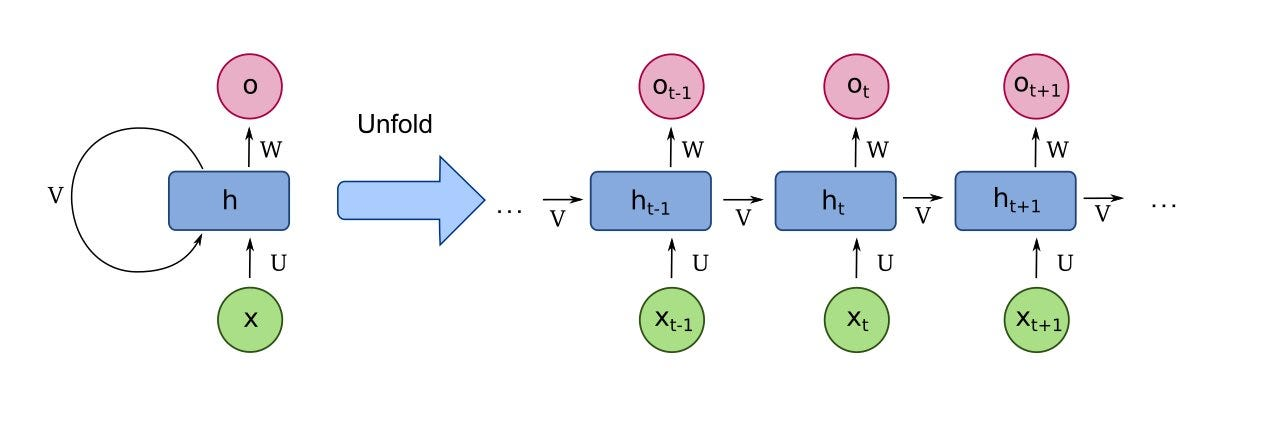

Let's try this implementation. In order to best represent this input text, we can also use embeddings which will create a high dimensionality representation of the words, giving the model a better understanding of what a word *actually* means.

In [51]:
def build_RNN(v_layer, embedding_dims=100):
    model = tf.keras.Sequential()

    model.add(v_layer)

    model.add(tf.keras.layers.Embedding(input_dim=1000,
                                                    output_dim=embedding_dims))

    model.add(tf.keras.layers.SimpleRNN(units=128, return_sequences=True))
    model.add(tf.keras.layers.Dense(10, activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
    return model

trainn = np.array(train_X)[:,0]

v_layer = get_vectorize_layer(trainn)
rnn_model = build_RNN(v_layer)

rnn_history = rnn_model.fit(
  x = train_X,  # our sparse padded training data
  y = train_Y,  # corresponding binary labels
  epochs=5,    # number of passes through the training data
  verbose=1     # display some progress output during training
  )

Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.5434 - loss: 0.6914
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.5827 - loss: 0.6865
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.5711 - loss: 0.6783
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.5827 - loss: 0.6771
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.5738 - loss: 0.6808


The results aren't bad - but definitely not good. Let's establish our baseline as the most common label in our training data. This is actually non-disaster data, which comes out to 56%. Our model is only beating this baseline by 2% - it can most definitely be improved...but how?

What if we use some more powerful RNN with some interesting technology? How about LSTM?
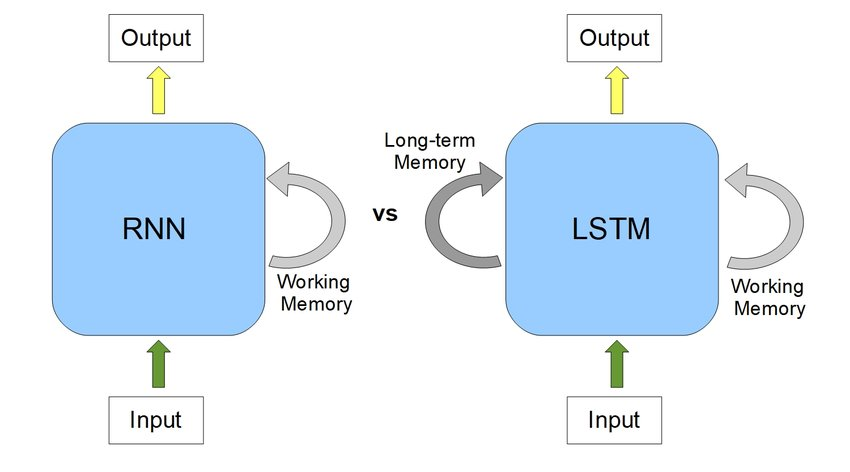

With LSTM, not only do we have some "working memory" as was described before with RNNs, but we add some amount of information that can continue to persist without being slowly lost as you continue through your neural network. Let's see how that works.

In [52]:
def build_RNN(v_layer, embedding_dims=100, LSTM_units=(64, 32), max_tweet_length=350):
  model = tf.keras.Sequential()

  model.add(v_layer)

  model.add(tf.keras.layers.Embedding(input_dim=1000,
                                                output_dim=embedding_dims))

  model.add(
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_units[0], return_sequences=True))
  )
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_units[1])))

  model.add(tf.keras.layers.Dense(10, activation='relu'))

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [53]:
trainn = np.array(train_X)[:,0]

v_layer = get_vectorize_layer(trainn)
lstm_model = build_RNN(v_layer)

lstm_history = lstm_model.fit(
  x = train_X,  # our sparse padded training data
  y = train_Y,  # corresponding binary labels
  epochs=5,    # number of passes through the training data
  verbose=1     # display some progress output during training
  )

Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 51s 255ms/step - accuracy: 0.5392 - loss: 0.6918
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 59s 309ms/step - accuracy: 0.5655 - loss: 0.6871
Epoch 3/5
161/191 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - accuracy: 0.5664 - loss: 0.6851 

KeyboardInterrupt: 

Woah - we're seeing a huge improvement. Definitely better than the .58% that we previously had. Previously, we've used the embeddings as part of the built-in tensorflow layer. Now, what if we used the pre-trained GloVe embeddings which should have a more accurate and rich understanding of what each word actually represents.

Following the instructions on keras website we can use the pre-trained GloVe embeddings to further improve our model:

In [ ]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip -q ./glove.6B.zip

Lets load the 200-dimensional embeddings:

In [ ]:
path_to_glove_file = "glove.6B.200d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Creating the embedding layer and adding the exisitng weights to it.

In [ ]:
trainn = np.array(train_X)[:,0]
v_layer = get_vectorize_layer(trainn)

voc = v_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

num_tokens = len(voc) + 2
embedding_dim = 200
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

In [ ]:
embedding_layer = tf.keras.layers.Embedding(
    num_tokens,
    embedding_dim,
    trainable=False,
)
embedding_layer.build((1,))
embedding_layer.set_weights([embedding_matrix])

In [ ]:
def build_RNN(v_layer, embedding_dims=100, LSTM_units=[64, 32], max_tweet_length=350, custom_embeddings_layer=None):
  model = tf.keras.Sequential()

  model.add(v_layer)

  if not custom_embeddings_layer:
    model.add(tf.keras.layers.Embedding(input_dim=1000,
                                                output_dim=embedding_dims))
  else:
    model.add(custom_embeddings_layer)

  model.add(
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_units[0], return_sequences=True))
  )
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_units[1])))

  model.add(tf.keras.layers.Dense(10, activation='relu'))

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [ ]:
custom_embedding_model = build_RNN(v_layer, custom_embeddings_layer=embedding_layer)

custom_embedding_history = custom_embedding_model.fit(
  x = train_X,  # our sparse padded training data
  y = train_Y,  # corresponding binary labels
  epochs=5,    # number of passes through the training data
  verbose=1     # display some progress output during training
  )

## Results & Error Analysis

Let's look into how the different models did versus the validation data.

In [ ]:
from sklearn.metrics import confusion_matrix

def test_model(model_name, model, val_data, val_labels):
    predictions = model.predict(val_data)
    predictions = predictions.round().astype(int)
    matrix = confusion_matrix(val_labels, predictions)
    plt.imshow(matrix, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.show()
    accuracy = (predictions == val_labels).sum() / len(val_labels)
    print(f"{model_name} has accuracy of: {accuracy}")
    return predictions

val_input = np.array(val_X)[:,0]
rnn_predictions = test_model("RNN Model", rnn_model, val_input, val_Y)
lstm_predictions = test_model("LSTM Model", lstm_model, val_input, val_Y)
custom_embedding_predictions = test_model("Custom Embedding LSTM Model", custom_embedding_model, val_input, val_Y)

In [ ]:
display(val_X[val_Y != lstm_predictions][:5])

...

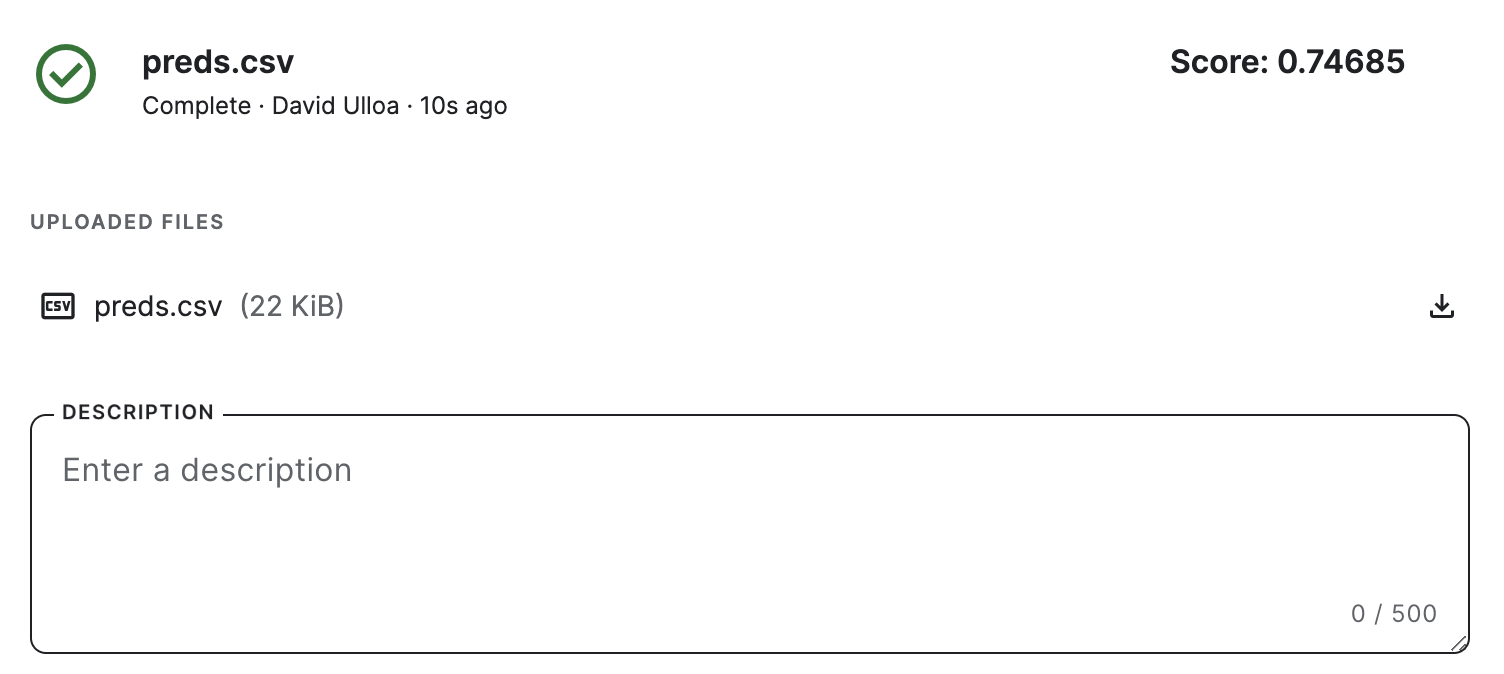

## Conclusion

Our project focused on using different archictures for NLP and classifying whether or not a tweet belong to a disaster or not. In trying these different architctures that we didn't learn in class - like RNNs and LSTM for RNNs - we learned a lot about how just small changes can have a significant impact on the result. We started with preparing the dataset through padding and vectorization. After this, by combining an embedding layer, we were confident in the representation of the text and only had to worry about the architecture of the model. Running three experiments - a simple RNN, LSTM RNNs, and LSTM RNNs w/ custom embeddings, we got to learn in more depth how to slowly improve the model as time went on.

Despite this work, we were able to beat our baseline, but not get exceptional results. Looking into our mistakes, we see the model got around a 75% validation accuracy, but a training accuracy of 95%. This suggest some kind of overfitting on the training data, which could be improved with less epochs or building smaller models. We also see through our confusion matrix that we get more false positive errors compared to false negatives. In this case, along with the other solutions suggested, we can adjust the threshold for disaster and non-disaster classification from .5 to maybe a slightly higher value.